### Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up a python code with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most? <br><br>
b. If the weekly sales show a seasonal trend, when and what could be the reason?<br><br>
c. Does temperature affect the weekly sales in any manner?<br><br>
d. How is the Consumer Price index affecting the weekly sales of various stores?<br><br>
e. Top performing stores according to the historical data.<br><br>
f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.<br><br>


**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

**Load the data and EDA**

In [2]:
# Load the data
data = pd.read_csv('Walmart DataSet.csv')

# General overview of data
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
# Check for missing values
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [4]:
# Check the unique values for the categorical column store
data['Store'].nunique()

45

**Preprocess the Data**

In [5]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

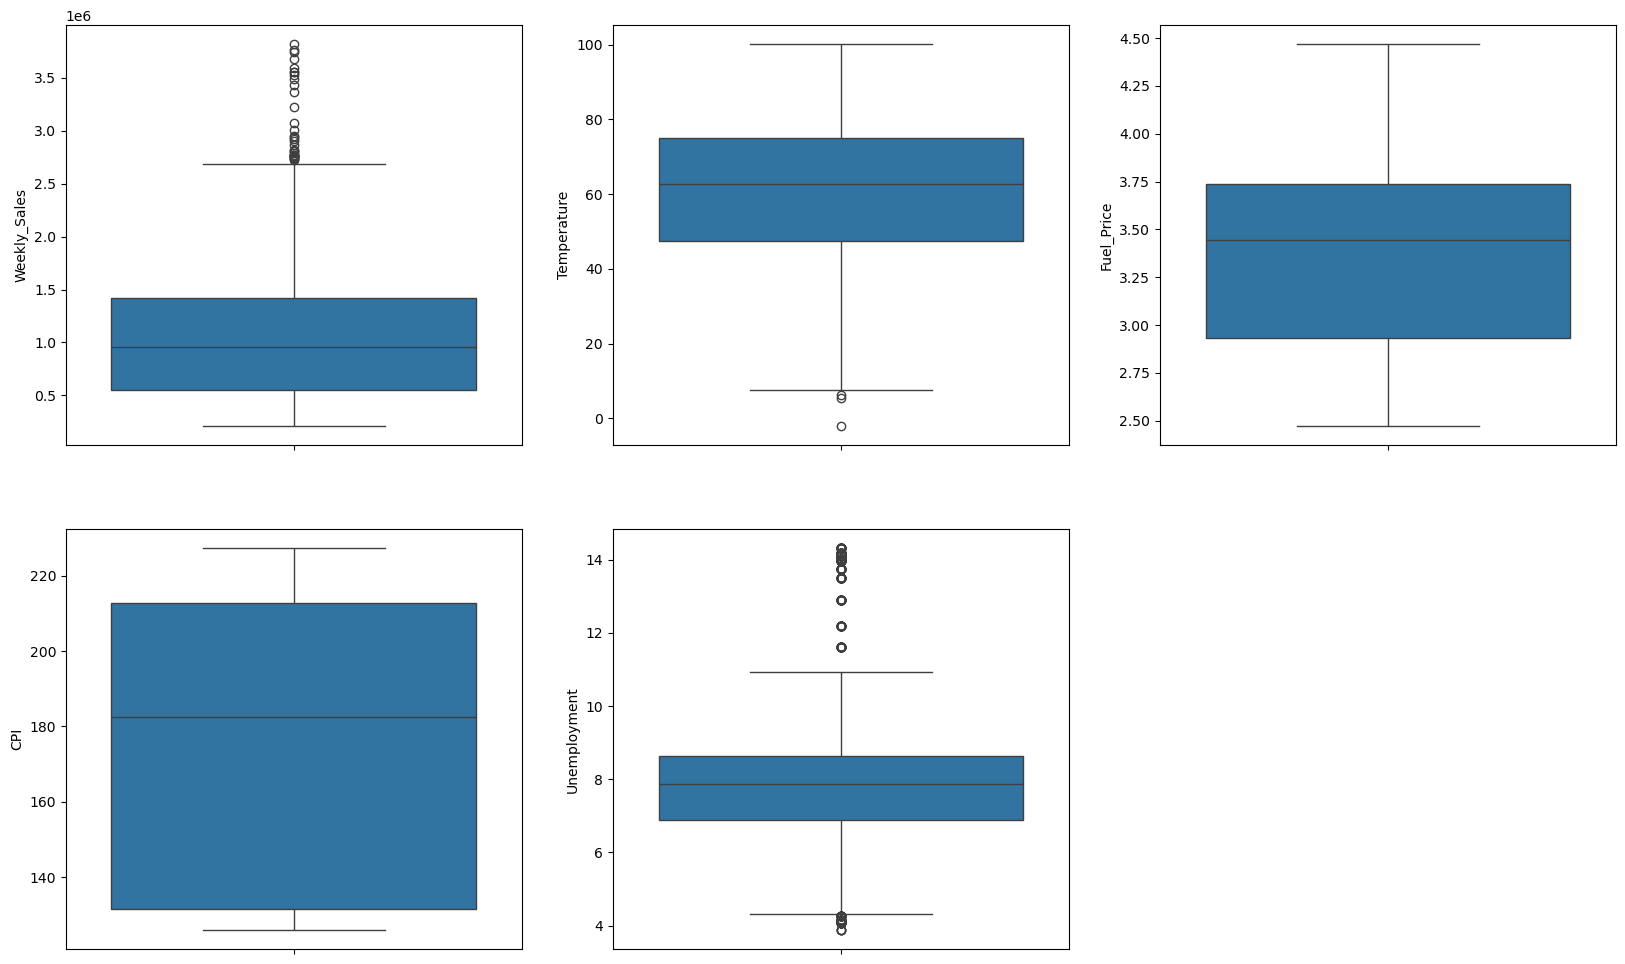

In [6]:
# Outlier analysis using box plots
num_var = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = num_var[0], data = data)
plt.subplot(2,3,2)
sns.boxplot(y = num_var[1], data = data)
plt.subplot(2,3,3)
sns.boxplot(y = num_var[2], data = data)
plt.subplot(2,3,4)
sns.boxplot(y = num_var[3], data = data)
plt.subplot(2,3,5)
sns.boxplot(y = num_var[4], data = data)
plt.show()


We observe that there are a few outliers in the Weekly Sales, Temperature and Unemployment columns

In [76]:
# Function to cap outliers using IQR
def cap_outliers(df, column, lower_pct=0.05, upper_pct=0.95):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Apply capping to outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])    
    return df

# Apply the capping function to the 'Weekly_Sales' column
data = cap_outliers(data, 'Weekly_Sales')
# Apply the capping function to the 'Temperature' column
data = cap_outliers(data, 'Temperature')
# Apply the capping function to the 'Unemployment' column
data = cap_outliers(data, 'Unemployment')

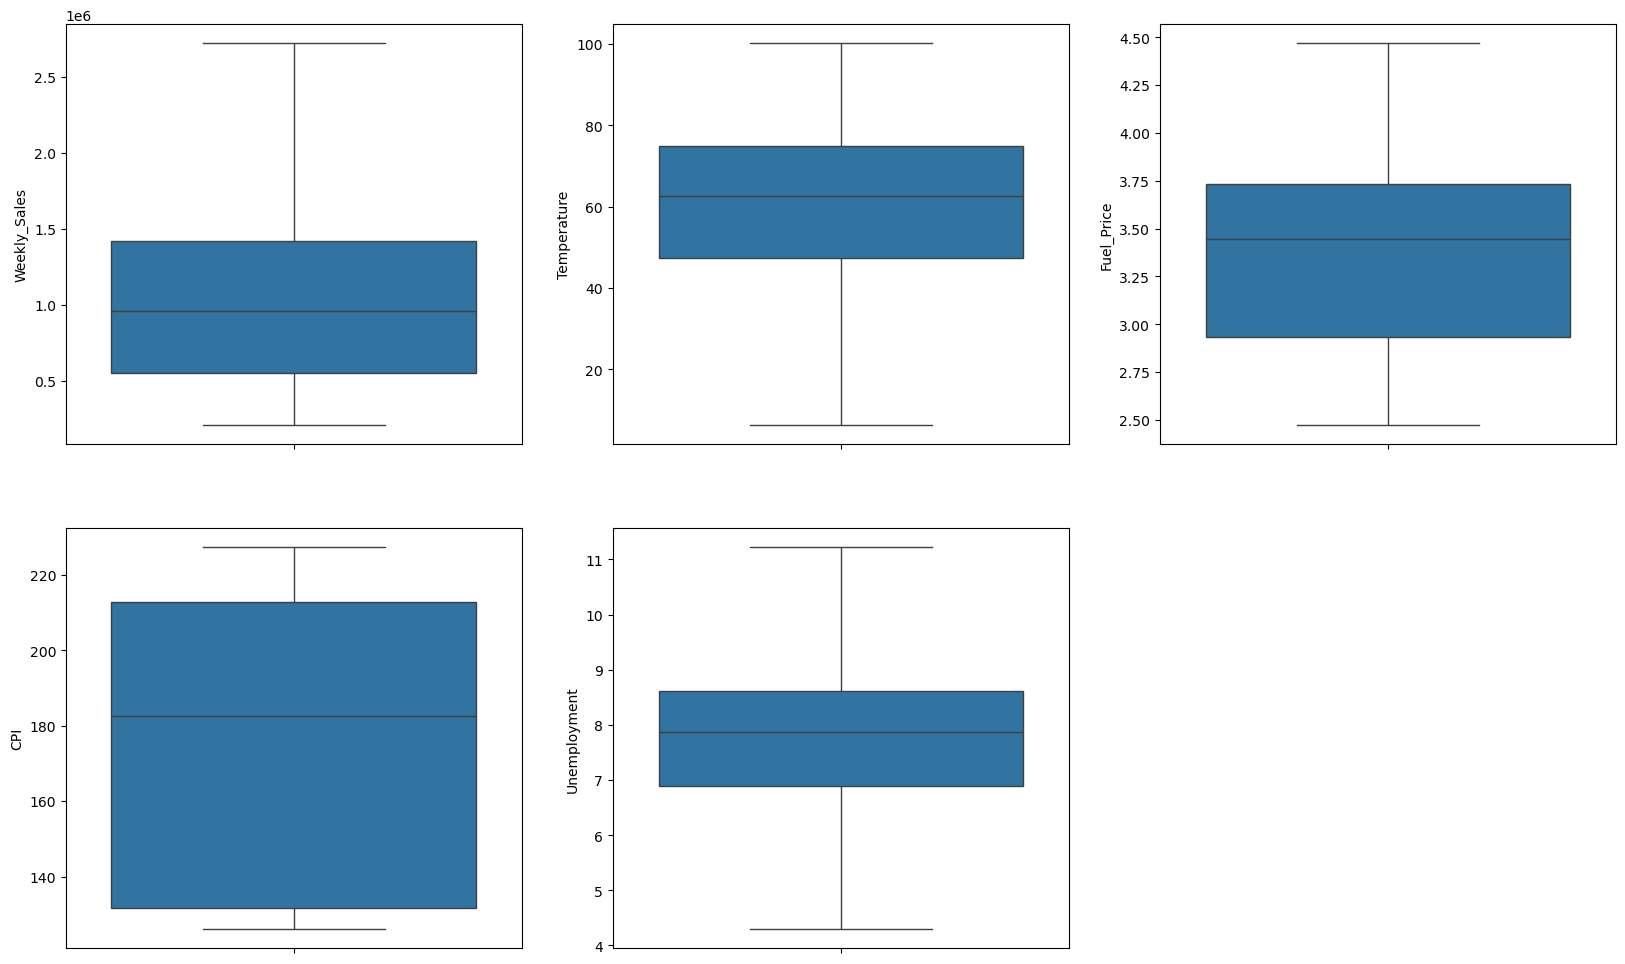

In [77]:
# Check if all outliers are treated
num_var = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y = num_var[0], data = data)
plt.subplot(2,3,2)
sns.boxplot(y = num_var[1], data = data)
plt.subplot(2,3,3)
sns.boxplot(y = num_var[2], data = data)
plt.subplot(2,3,4)
sns.boxplot(y = num_var[3], data = data)
plt.subplot(2,3,5)
sns.boxplot(y = num_var[4], data = data)
plt.show()


**a. Analyze Weekly Sales and Unemployment Rate**

If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

To determine if unemployment affects weekly sales and identify stores suffering the most, we’ll use the trendline and correlation analysis

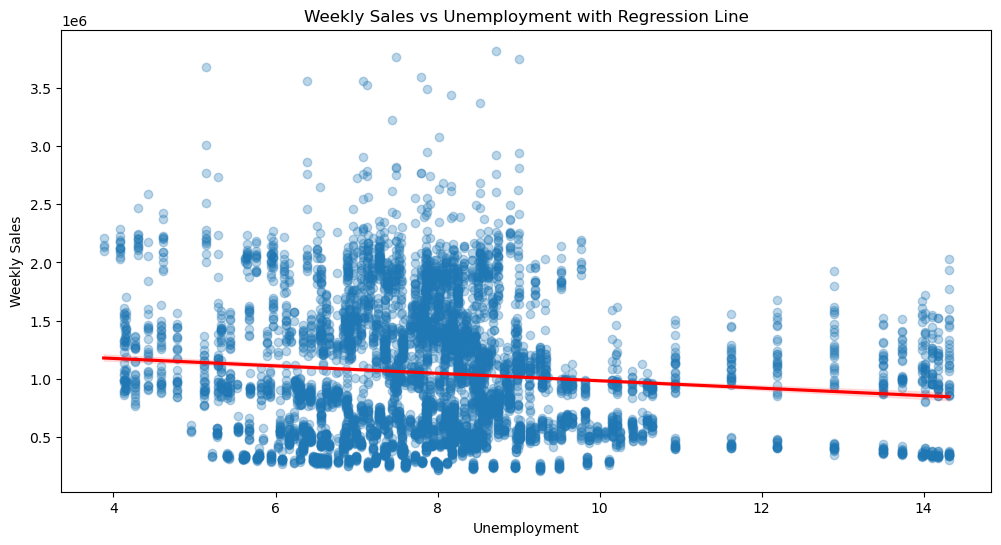

              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


In [75]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title('Weekly Sales vs Unemployment with Regression Line')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

print(data[['Weekly_Sales', 'Unemployment']].corr())

Correlation between Weekly Sales and Unemployment:



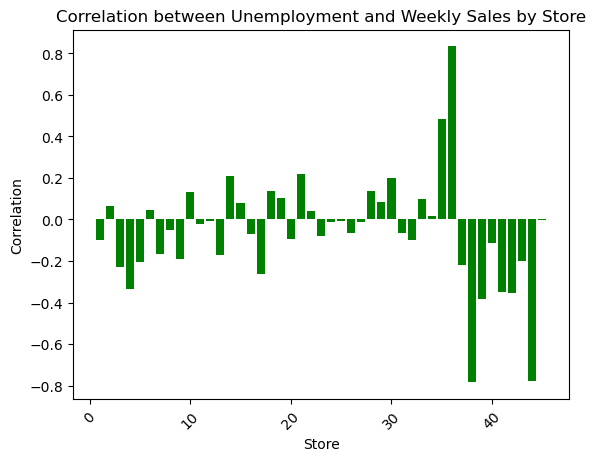

In [14]:
# Calculate correlation between Weekly Sales and Unemployment
correlation = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr()
correlation = correlation.iloc[0::2, -1].reset_index(level=1, drop=True)

corr_df = pd.DataFrame(correlation).reset_index()
corr_df.columns = ['Store', 'Corr']

print("Correlation between Weekly Sales and Unemployment:\n")
plt.bar(corr_df['Store'], corr_df['Corr'], color='green')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Correlation between Unemployment and Weekly Sales by Store')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Stores that are affected the most by Unemployment in terms of weekly sales are
corr_df['abs_corr'] = abs(corr_df['Corr'])
top_5_affected = corr_df.sort_values(by='abs_corr', ascending=False).reset_index(drop=True).iloc[:5, 0].to_list()

print(f"The top 5 stores most afftected by unemployment are {top_5_affected}")


The top 5 stores most afftected by unemployment are [36, 38, 44, 35, 39]


**b. Analyze Seasonal Trends in Weekly Sales**

We can use time-series decomposition to understand seasonality and trends in the sales data.

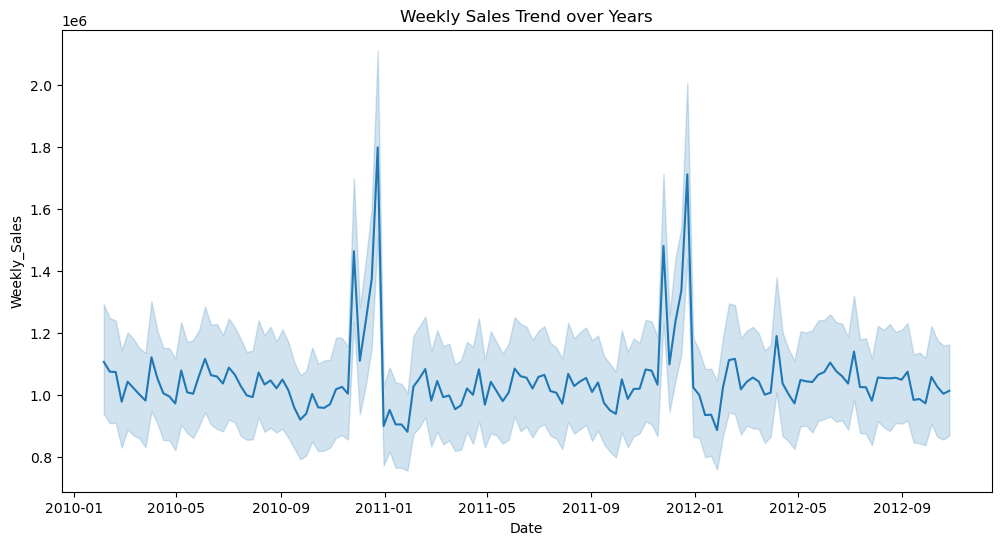

In [39]:
# Convert Date to datetime format and extract year and month for seasonal analysis
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month


# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data[['Date', 'Weekly_Sales']])
plt.title('Weekly Sales Trend over Years')
plt.show()

As can be observed from the plot, there is a clear seasonal pattern represented in the data. We observe that there is a significant peak in sales during the end of every year. This period co-incides with the holiday period, which explains the significant peaks in data.

To get a clearer picture, let's look at the same data rolled up at a month level, and compare it across years

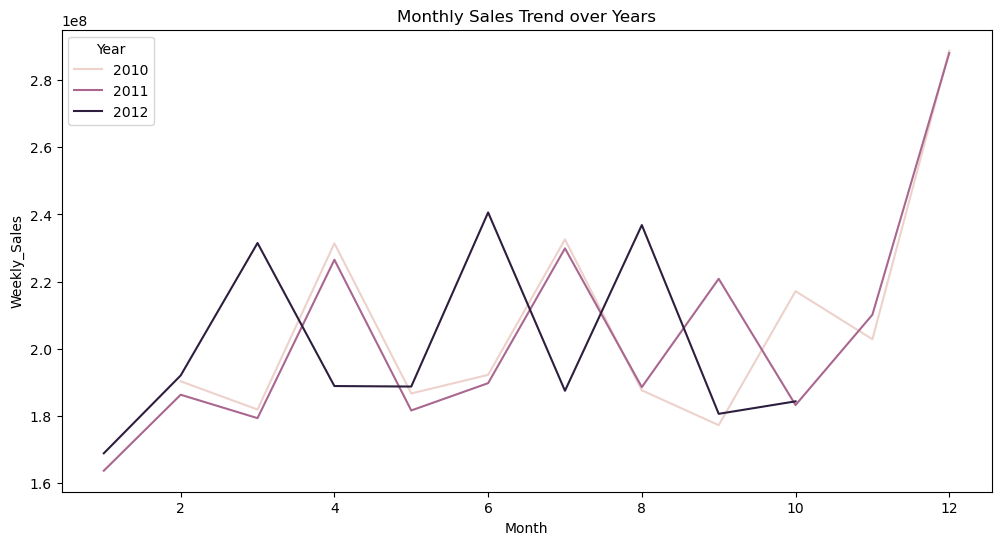

In [33]:
# Aggregate weekly sales per month to observe seasonal patterns
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trend over Years')
plt.show()

The peak in the month of December explains the impact of the holiday period on Store sales.

**c. Analyze Effect of Temperature on Weekly Sales**

In order to understand the impact of temperature on sales, we will try looking at a scatter plot comparison along with a line of best fit to see if there is any relation between these features

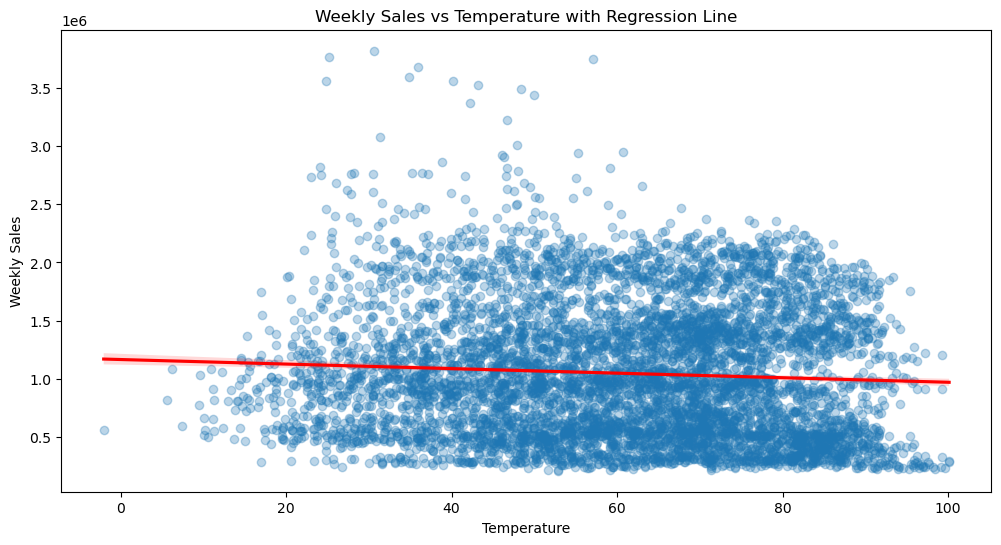

In [38]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Temperature', y='Weekly_Sales', data=data, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title('Weekly Sales vs Temperature with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


There is a slightly downward moving trend indicating the a rise in temperature has a minor negative impact on weekly sales.

Along with the above trendline analysis, we'll have a look at the distributions of weekly sales after bucketing the different temperature range into 4 groups

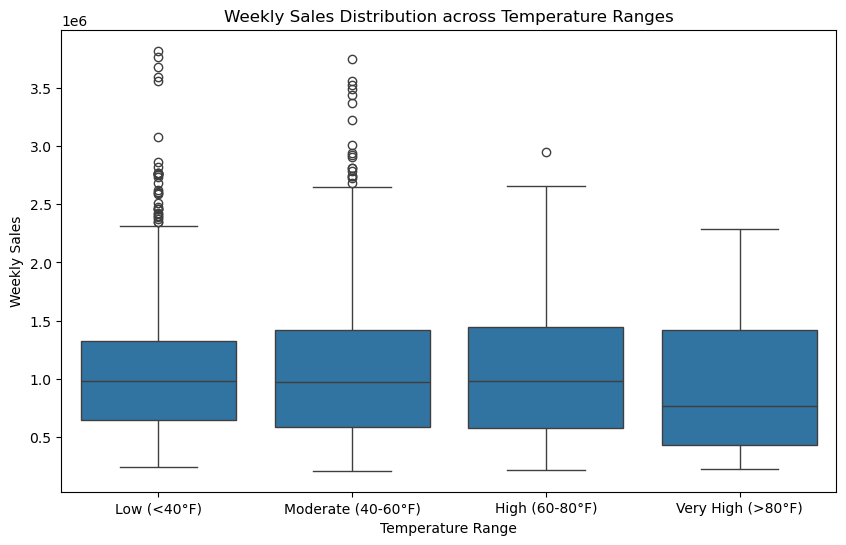

In [41]:
# Define temperature bins
bins = [data['Temperature'].min(), 40, 60, 80, data['Temperature'].max()]
labels = ['Low (<40°F)', 'Moderate (40-60°F)', 'High (60-80°F)', 'Very High (>80°F)']
data['Temp_Range'] = pd.cut(data['Temperature'], bins=bins, labels=labels)

# Plot box plot of weekly sales across temperature ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Temp_Range', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Distribution across Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('Weekly Sales')
plt.show()


From the above boxplot analysis, we can further identify that increase in tempreature tends to have a minor negative impact on the weekly sales

**d. Effect of Consumer Price Index (CPI) on Weekly Sales**


The Consumer Price Index (CPI) is a measure used to assess the average change in prices over time that consumers pay for a basket of goods and services. It is also a key indicator of inflation.

A hexbin plot is useful for dense datasets and can reveal the concentration of data points, helping us identify common CPI ranges associated with high or low weekly sales.

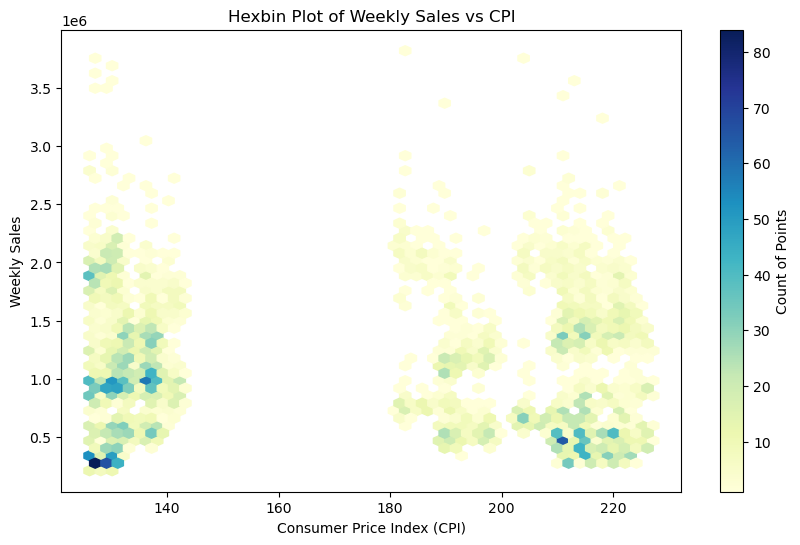

In [ ]:
# hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(data['CPI'], data['Weekly_Sales'], gridsize=50, cmap='YlGnBu', mincnt=1)
plt.colorbar(label='Count of Points')
plt.title('Hexbin Plot of Weekly Sales vs CPI')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()


From the above hexbin plot, we can see that majority of sales happened during periods when the CPI was either low or high.

However, this does not reveal the impact it had on the buying behaviour of individual customers.

We can bin the CPI values into deciles and then use a box plot to see the distribution of weekly sales within these ranges. This helps identify whether there are noticeable differences in sales associated with different CPI levels.

C:\Users\91991\AppData\Local\Temp\ipykernel_3960\3126243107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CPI_Decile', y='Weekly_Sales', data=data, palette='Spectral')


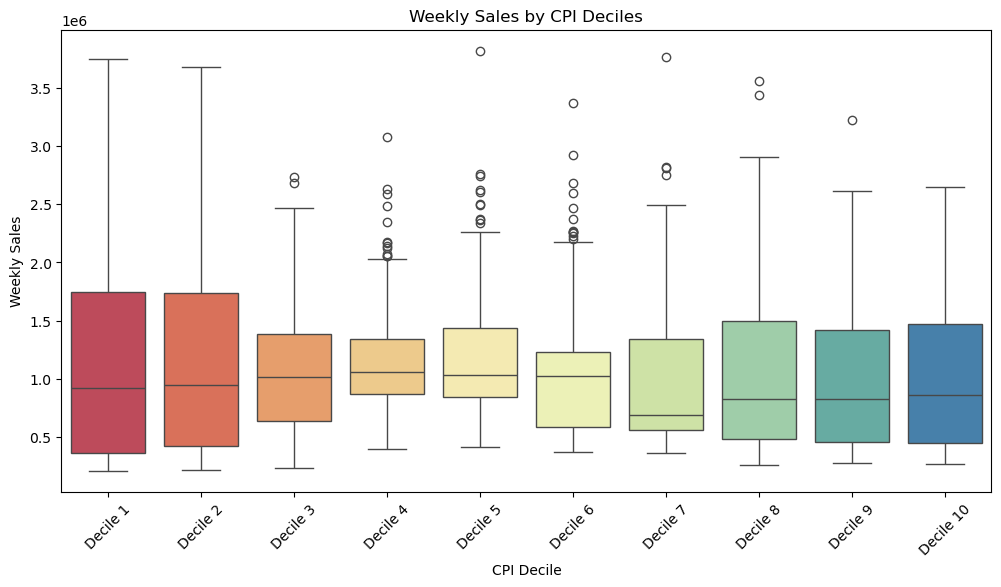

In [62]:
# Create CPI deciles
data['CPI_Decile'] = pd.qcut(data['CPI'], 10, labels=[f'Decile {i+1}' for i in range(10)])

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='CPI_Decile', y='Weekly_Sales', data=data, palette='Spectral')
plt.title('Weekly Sales by CPI Deciles')
plt.xlabel('CPI Decile')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\91991\AppData\Local\Temp\ipykernel_3960\778444931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CPI_Decile', y='Weekly_Sales', data=data, palette='Spectral')


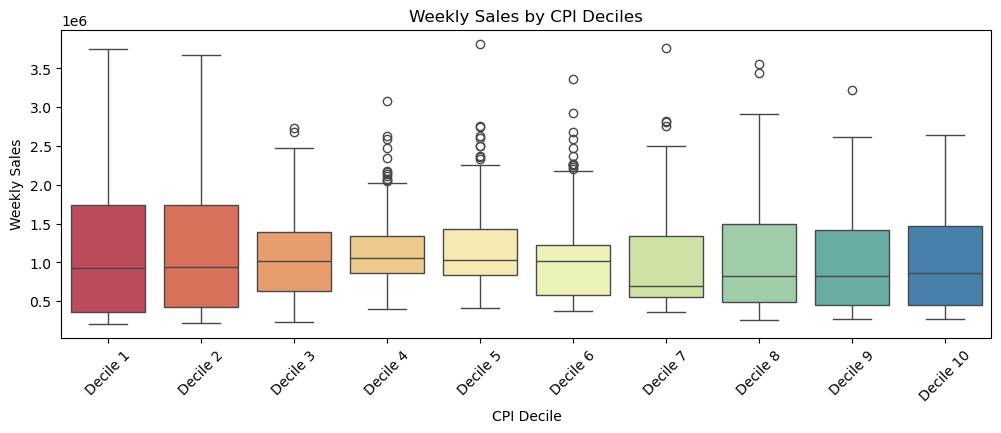

In [63]:
# Create CPI deciles
data['CPI_Decile'] = pd.qcut(data['CPI'], 10, labels=[f'Decile {i+1}' for i in range(10)])

# Box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='CPI_Decile', y='Weekly_Sales', data=data, palette='Spectral')
plt.title('Weekly Sales by CPI Deciles')
plt.xlabel('CPI Decile')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


From the above boxplot analysis, we can clearly observe that the periods with moderate CPI levels resulted in the highest average spend per customer.

**e. Identify Top Performing Stores**

Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


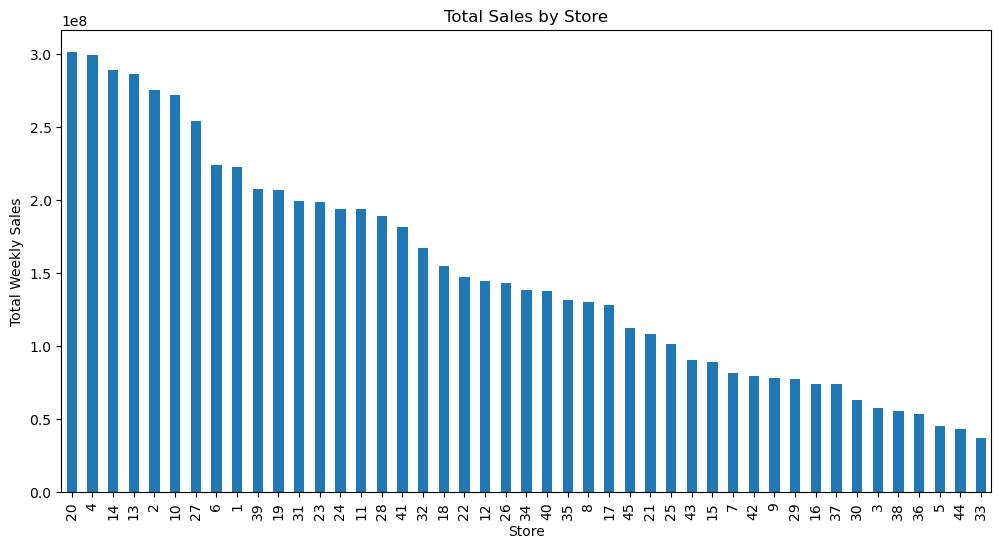

In [64]:
# Calculate total sales per store
total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Performing Stores:\n", total_sales_per_store.head())

# Visualization
plt.figure(figsize=(12, 6))
total_sales_per_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.ylabel('Total Weekly Sales')
plt.show()


The top performing stores in terms of overall sales are:
1. 20
2. 4
3. 14
4. 13
5. 2

**f. Identify the Worst Performing Store** and how significant is the difference between the highest and lowest performing stores.

Firstly, let's look at a box plot that allows us to compare the overall difference between the top store and the worst store.

The worst performing store is Store 33 with total sales of 37160221.96
Difference between best and worst performing store: 264237570.50


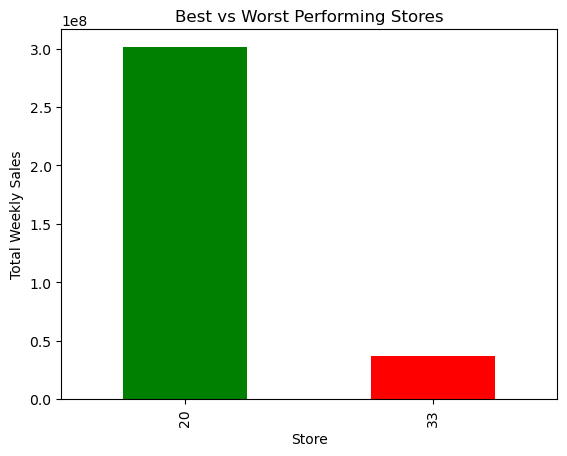

The highest performing store is 711% better than the lowest performing store


In [73]:
# Worst performing store
worst_store = total_sales_per_store.idxmin()
best_store = total_sales_per_store.idxmax()

# Calculate the sales difference between best and worst stores
sales_difference = total_sales_per_store[best_store] - total_sales_per_store[worst_store]
print(f"The worst performing store is Store {worst_store} with total sales of {total_sales_per_store[worst_store]:.2f}")
print(f"Difference between best and worst performing store: {sales_difference:.2f}")

# Visualization of best and worst stores
top_bottom_sales = total_sales_per_store.loc[[best_store, worst_store]]
top_bottom_sales.plot(kind='bar', color=['green', 'red'])
plt.title('Best vs Worst Performing Stores')
plt.ylabel('Total Weekly Sales')
plt.show()

perc_diff = sales_difference/total_sales_per_store[worst_store]
print(f"The highest performing store is {round(perc_diff*100)}% better than the lowest performing store")


Next, let's look at a line plot showing cumulative sales over time for the best and worst performing stores. This will help highlight how much of a difference there is in their performance over the weeks.

C:\Users\91991\AppData\Local\Temp\ipykernel_3960\1338414996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_store_data['Cumulative_Sales'] = top_store_data['Weekly_Sales'].cumsum()
C:\Users\91991\AppData\Local\Temp\ipykernel_3960\1338414996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_store_data['Cumulative_Sales'] = bottom_store_data['Weekly_Sales'].cumsum()


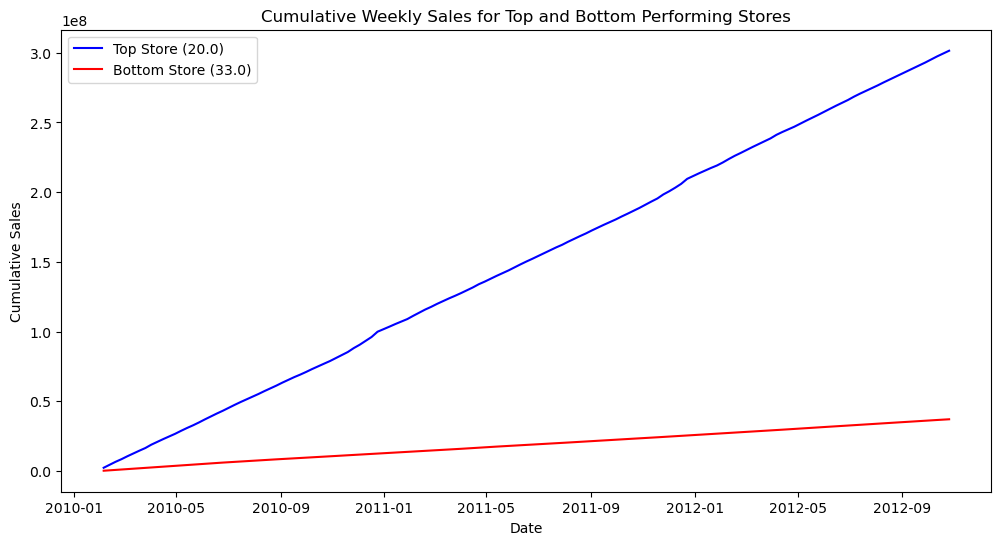

In [ ]:
# Calculate average weekly sales per store
store_sales_avg = data.groupby('Store')['Weekly_Sales'].mean().reset_index()
# Sort by sales
store_sales_avg = store_sales_avg.sort_values(by='Weekly_Sales', ascending=False)

top_store = store_sales_avg.iloc[0]
bottom_store = store_sales_avg.iloc[-1]

# Get the top and bottom stores
top_store_data = data[data['Store'] == top_store['Store']]
bottom_store_data = data[data['Store'] == bottom_store['Store']]

# Calculate cumulative sales for top and bottom stores
top_store_data['Cumulative_Sales'] = top_store_data['Weekly_Sales'].cumsum()
bottom_store_data['Cumulative_Sales'] = bottom_store_data['Weekly_Sales'].cumsum()

# Plot cumulative sales over time
plt.figure(figsize=(12, 6))
plt.plot(top_store_data['Date'], top_store_data['Cumulative_Sales'], label=f'Top Store ({top_store["Store"]})', color='blue')
plt.plot(bottom_store_data['Date'], bottom_store_data['Cumulative_Sales'], label=f'Bottom Store ({bottom_store["Store"]})', color='red')
plt.title('Cumulative Weekly Sales for Top and Bottom Performing Stores')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.legend()
plt.show()


#### Summary of Insights from the Analysis

**1. Impact of Unemployment on Sales**  
A moderately negative correlation was observed between unemployment and weekly sales. Higher unemployment leads to lower sales, especially in the following stores - 36, 38, 44, 35, 39. These stores need targeted strategies like promotions or community engagement.

**2. Seasonality of Sales**  
Sales peak during holiday periods and drop during non-holiday weeks. This trend is consistent across stores, and retailers should adjust inventory and marketing to match demand spikes around holidays.

**3. Effect of Temperature on Sales**  
Higher temperatures negatively affect sales in some regions, particularly during summer. There is a slightly downward moving trend indicating the a rise in temperature has a moderate negative impact on weekly sales. Retailers should consider adjusting strategies during extreme weather conditions.

**4. Impact of CPI on Sales**  
Rising CPI (inflation) is negatively correlated with sales. As the cost of living rises, consumer spending decreases. We observed that periods with moderate CPI tends to be the period during which customers spend the most.

**5. Top Performing Stores**  
The top performing stores in terms of overall sales are: 20, 4, 14, 13, 2. These stores consistently outperform others in sales, probably benefiting from better management, marketing, and customer engagement.

**6. Worst Performing Store**  
The worst-performing store is store 33. This store shows significantly lower sales, possibly due to poor location, high unemployment, or ineffective strategies. The percentage difference between the best and worst store is a massive 711% in terms of sales.


#### Key Recommendations:

1. **Seasonal Adjustments**: Forecast and adjust stock for peak holiday seasons and consider weather impacts.
2. **Improve Low-Performing Stores**: Focus on location-specific issues and strategies to boost sales.
3. **Monitor CPI Trends**: Adjust pricing and promotions based on inflation.
4. **Replicate Best Practices**: Apply successful strategies from top-performing stores to underperforming ones.

These insights provide a clearer understanding of how local economic conditions, seasonality, and strategic adjustments can drive store performance and sales.
